# Washout Analysis Summary (1, 3, 6 Months)

This notebook presents washout analyses to address reverse causation concerns, focusing on **short-term washout periods (1, 3, 6 months)** as requested by reviewers.

## Analysis: Short-Term Washout

**Fixed prediction point**: Enrollment (t0)

**Method**: 
- Uses pre-trained phi/psi (learned from full data)
- Only refits lambda with censored E matrix
- Varies the washout period (amount of data blinded before enrollment)

**Washout periods tested**:
- **1, 3, 6 months** (HESIN-based, using hospital episode data)

**Question**: "If we exclude events in the washout window before enrollment, how well can we predict future events from enrollment?"

**Why this approach**:
- Same prediction timepoint (enrollment) across all washout periods
- Only the amount of blinded data varies
- Cleaner interpretation: isolates the effect of excluding reverse causation events
- Directly addresses reviewer concerns about diagnostic cascade and reverse causation


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Paths
results_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/washout_evaluation')
offset_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/washout_fixed_timepoint/pooled_retrospective')

# Key diseases for presentation
KEY_DISEASES = [
    'ASCVD', 'All_Cancers', 'Atrial_Fib', 'Diabetes', 'CKD', 
    'Heart_Failure', 'Breast_Cancer', 'Colorectal_Cancer', 
    'Lung_Cancer', 'Parkinsons'
]


## Washout Results (1, 3, 6 months)

HESIN-based washout analysis using hospital episode data to exclude events in the washout window before enrollment.


In [17]:
# Load 1, 3, 6 month washout results
df_short = pd.read_csv(results_dir / 'washout_comparison_1yr_10yr.csv', index_col=0)

# Extract key diseases
df_short_key = df_short.loc[df_short.index.intersection(KEY_DISEASES)]

# Create summary table for 1-year predictions
summary_short = pd.DataFrame({
    'Disease': df_short_key.index,
    'No_Washout': df_short_key['no_washout_1yr_AUC'].values,
    '1_Month': df_short_key['1month_1yr_AUC'].values,
    '3_Month': df_short_key['3month_1yr_AUC'].values,
    '6_Month': df_short_key['6month_1yr_AUC'].values,
})

# Calculate drops
summary_short['Drop_1mo'] = summary_short['No_Washout'] - summary_short['1_Month']
summary_short['Drop_3mo'] = summary_short['No_Washout'] - summary_short['3_Month']
summary_short['Drop_6mo'] = summary_short['No_Washout'] - summary_short['6_Month']

summary_short = summary_short.sort_values('No_Washout', ascending=False)
summary_short


,Disease,No_Washout,1_Month,3_Month,6_Month,Drop_1mo,Drop_3mo,Drop_6mo
9,Parkinsons,0.996999,0.996999,0.996999,0.996999,0.000000,0.000000,0.000000
4,CKD,0.874050,0.874000,0.874125,0.874175,0.000050,-0.000075,-0.000125
0,ASCVD,0.870014,0.869998,0.868618,0.861954,0.000017,0.001397,0.008060
5,Colorectal_Cancer,0.868501,0.868529,0.868608,0.868515,-0.000029,-0.000107,-0.000014
7,Heart_Failure,0.835543,0.835500,0.835226,0.835199,0.000043,0.000317,0.000344
2,Atrial_Fib,0.773741,0.770820,0.768815,0.768735,0.002921,0.004926,0.005006
6,Diabetes,0.754432,0.739635,0.732297,0.732268,0.014797,0.022135,0.022164
1,All_Cancers,0.753935,0.752962,0.753392,0.751774,0.000974,0.000544,0.002161
8,Lung_Cancer,0.752895,0.752912,0.752061,0.751894,-0.000017,0.000834,0.001001
3,Breast_Cancer,0.744770,0.741300,0.719557,0.686415,0.003469,0.025213,0.058354


In [ ]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/pythonscripts/evaluate_washout_results.py

## Summary Statistics

Key statistics for short-term washout analysis.


In [18]:
# Calculate summary statistics for short-term washout
summary_stats = pd.DataFrame({
    'Disease': summary_short['Disease'],
    'No_Washout_AUC': summary_short['No_Washout'],
    '1_Month_AUC': summary_short['1_Month'],
    '3_Month_AUC': summary_short['3_Month'],
    '6_Month_AUC': summary_short['6_Month'],
    'Drop_1mo': summary_short['Drop_1mo'],
    'Drop_3mo': summary_short['Drop_3mo'],
    'Drop_6mo': summary_short['Drop_6mo'],
})

# Calculate mean drop across all short-term washout periods
summary_stats['Mean_Drop'] = summary_stats[['Drop_1mo', 'Drop_3mo', 'Drop_6mo']].mean(axis=1)
summary_stats['Max_Drop'] = summary_stats[['Drop_1mo', 'Drop_3mo', 'Drop_6mo']].max(axis=1)

summary_stats = summary_stats.sort_values('No_Washout_AUC', ascending=False)

# Create summary table
summary_table = summary_stats[['Disease', 'No_Washout_AUC', 
                                'Drop_1mo', 'Drop_3mo', 'Drop_6mo', 
                                'Mean_Drop', 'Max_Drop']].round(4)
summary_table.columns = ['Disease', 'No Washout AUC', 
                         'Drop (1mo)', 'Drop (3mo)', 'Drop (6mo)',
                         'Mean Drop', 'Max Drop']
summary_table


,Disease,No Washout AUC,Drop (1mo),Drop (3mo),Drop (6mo),Mean Drop,Max Drop
9,Parkinsons,0.9970,0.0000,0.0000,0.0000,0.0000,0.0000
4,CKD,0.8740,0.0001,-0.0001,-0.0001,-0.0001,0.0001
0,ASCVD,0.8700,0.0000,0.0014,0.0081,0.0032,0.0081
5,Colorectal_Cancer,0.8685,-0.0000,-0.0001,-0.0000,-0.0001,-0.0000
7,Heart_Failure,0.8355,0.0000,0.0003,0.0003,0.0002,0.0003
2,Atrial_Fib,0.7737,0.0029,0.0049,0.0050,0.0043,0.0050
6,Diabetes,0.7544,0.0148,0.0221,0.0222,0.0197,0.0222
1,All_Cancers,0.7539,0.0010,0.0005,0.0022,0.0012,0.0022
8,Lung_Cancer,0.7529,-0.0000,0.0008,0.0010,0.0006,0.0010
3,Breast_Cancer,0.7448,0.0035,0.0252,0.0584,0.0290,0.0584


✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/washout_evaluation/washout_performance_plot.png
✓ Saved summary plot to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/washout_evaluation/washout_drop_summary.png

WASHOUT IMPACT SUMMARY

1-Year Predictions (No Washout → 6-Month Washout):
  Mean AUC drop: 0.0112
  Median AUC drop: 0.0026
  Max AUC drop: 0.0584 (Breast_Cancer)
  Min AUC drop: -0.0000 (Colorectal_Cancer)

10-Year Predictions (No Washout → 6-Month Washout):
  Mean AUC drop: 0.0010
  Median AUC drop: 0.0001
  Max AUC drop: 0.0066 (Breast_Cancer)
  Min AUC drop: 0.0000 (Stroke)

✓ All plots saved successfully!


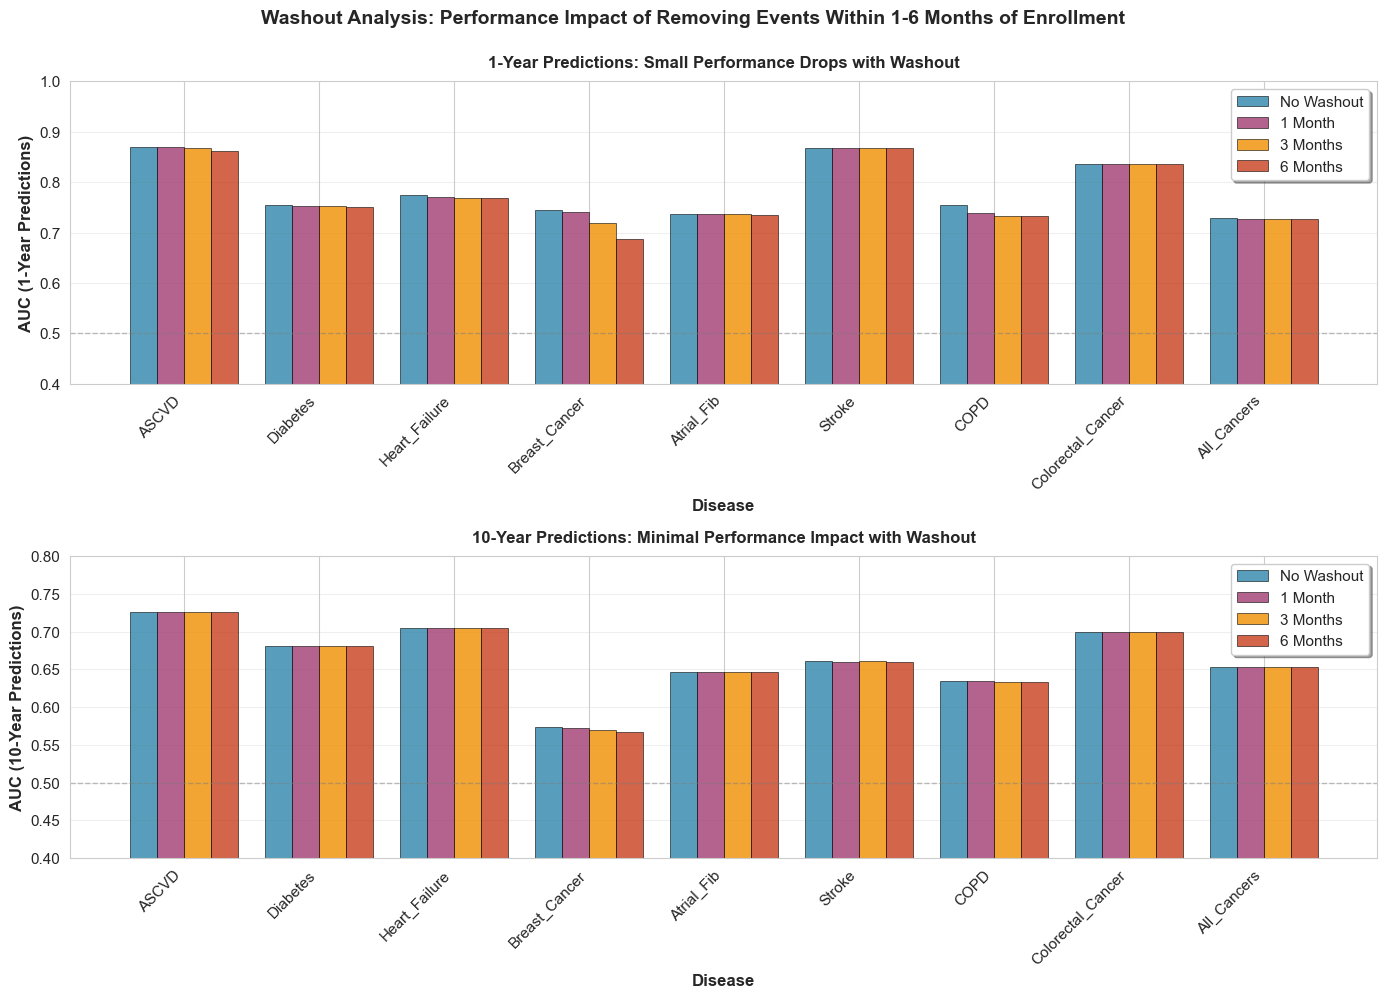

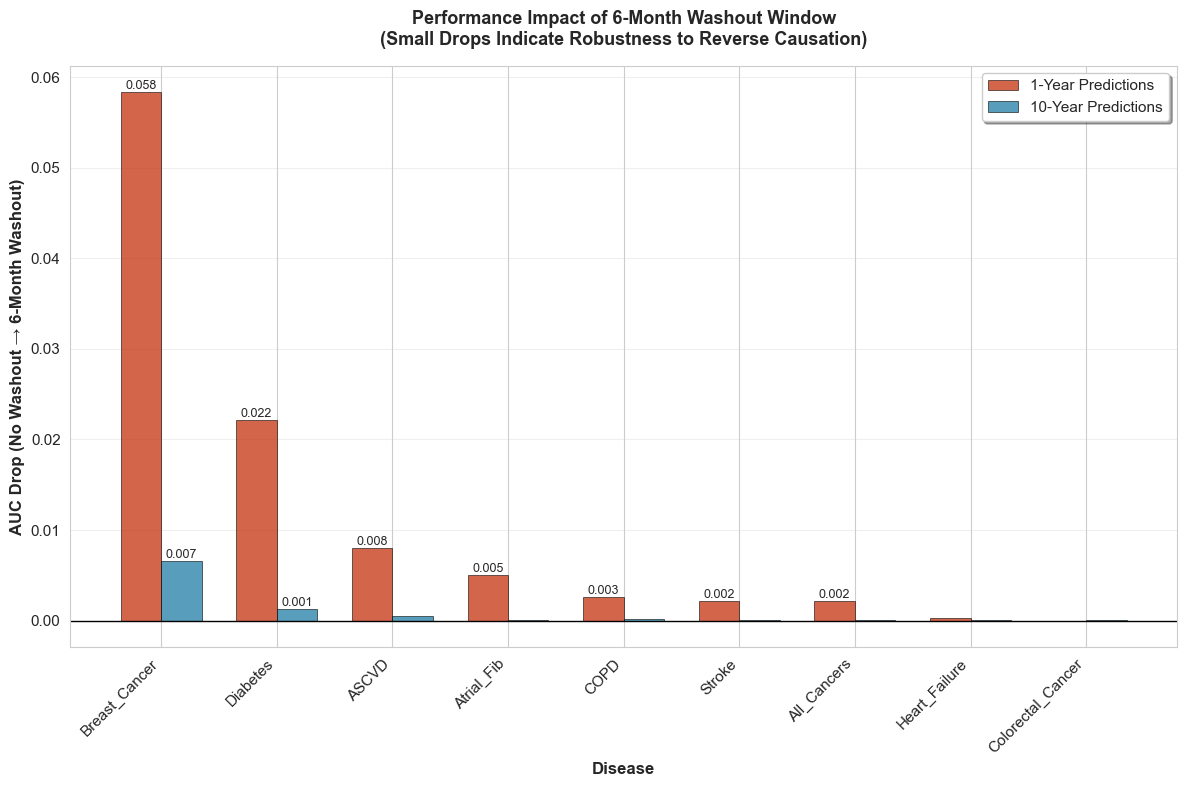

In [19]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/pythonscripts/plot_washout_results.py